In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor



mnist_train = MNIST("./data/download",
                    train = True,
                    transform = ToTensor())

mnist_test = MNIST("./data/download",
                    train = False,
                    transform = ToTensor())

In [62]:
K_tr_tr = np.loadtxt("./data/out/K_train_train.csv", delimiter= ',')
K_tr_tr = K_tr_tr + np.triu(K_tr_tr, 1).T

K_ts_tr = np.loadtxt("./data/out/K_test_train.csv", delimiter= ",")

In [78]:
eigvals, eigvecs = np.linalg.eigh(K_tr_tr[:5000, :5000])
eigvals

array([1.08880583e-03, 1.23254998e-03, 1.35146786e-03, ...,
       1.94864429e+02, 2.82849732e+02, 2.74060662e+03], shape=(5000,))

In [112]:
max_n = 300
n_images_test = 1013

def success_rate(n_images_tr, n_images_ts, tolerance: float = 0):
    A = K_ts_tr[:, :n_images_tr]
    B = K_tr_tr[:n_images_tr, :n_images_tr]
    Y_train = np.array([x for x in mnist_train.targets])[:n_images_tr] %2
    Y_test = np.array([x for x in mnist_test.targets])[:n_images_ts] %2
    predictions = A @ np.linalg.inv(B) @ Y_train

    return np.mean(
        np.abs(
            np.round(predictions) - Y_test
        ) <= tolerance
    )

In [ ]:
success_rate(1000, n_images_test)

np.float64(0.9358341559723593)

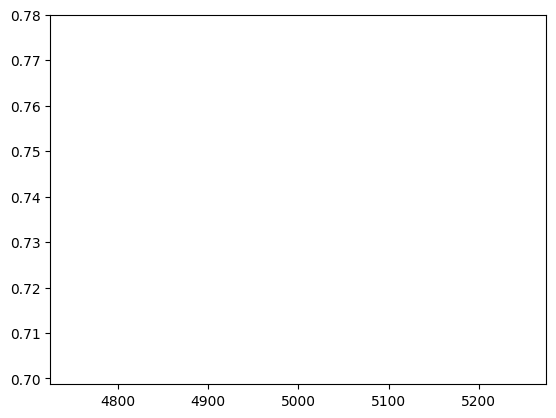

In [79]:
max_ns = np.array([5000])
ys = []
for n in max_ns:
    ys.append(success_rate(n, n_images_test))

plt.plot(max_ns, ys)
plt.show()

In [80]:
ys

[np.float64(0.7393879565646594)]

In [ ]:
predictions = A @ np.linalg.inv(B) @ Y_train

In [51]:
predictions

array([7.10755347, 0.06015539, 2.79625055, ..., 5.71666206, 1.96744021,
       7.43540055], shape=(1013,))

In [52]:
Y_test

array([7, 2, 1, ..., 4, 1, 7], shape=(1013,))

In [54]:
np.mean(
    np.abs(np.round(predictions) - Y_test) <= 1
)

np.float64(0.5903257650542941)

In [4]:
K_tr_tr.shape, K_ts_tr.shape

((10000, 10000), (1013, 10000))